In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = None
df = pd.read_csv('Boliga - Final for training.csv')

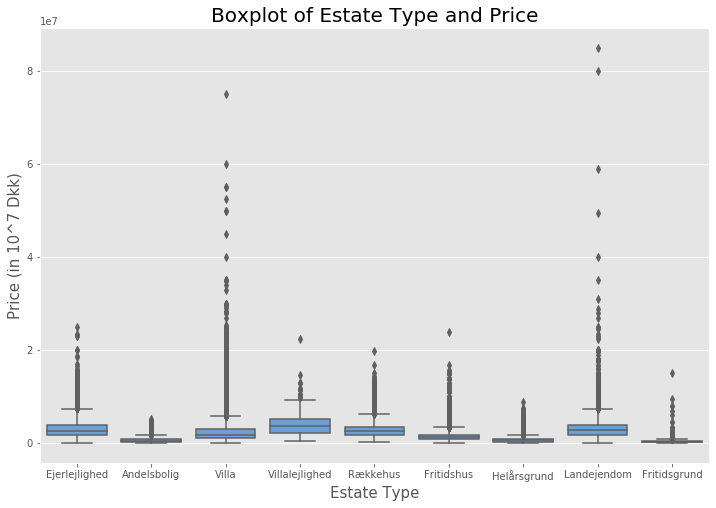

In [4]:
from numpy import median
import matplotlib.pyplot as plt
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.boxplot(x="Type", y="price", data=df, color = '#5AA0E7')
plt.title('Boxplot of Estate Type and Price', size = 20)
plt.xlabel('Estate Type', size = 15)
plt.ylabel('Price (in 10^7 Dkk)', size = 15)
#ax.set(ylim=(0, df.price.max()))
fig.savefig('Boxplot_Estate.png')

## Estate Type

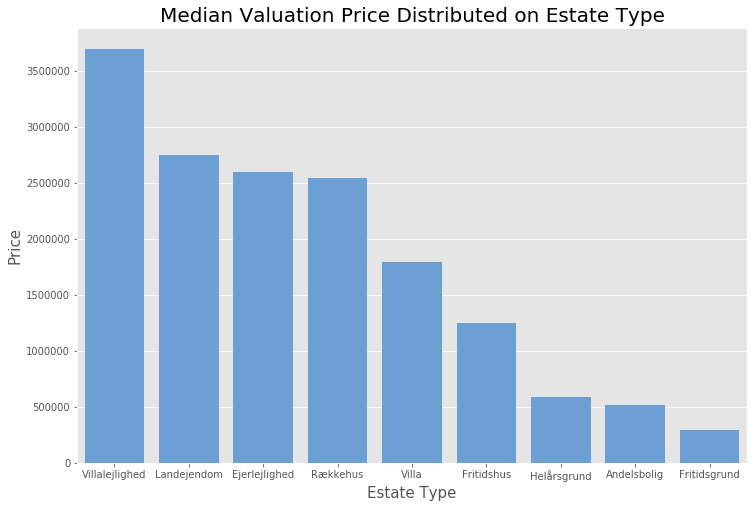

In [49]:
fig, ax = plt.subplots(figsize=(12,8))

df2 = df.groupby('Type').median().reset_index()
df2 = df2.sort_values('price', ascending = False)
ax = sns.barplot(x="Type", y="price", data=df2, color = '#5AA0E7')
plt.title('Median Valuation Price Distributed on Estate Type', size = 20)
plt.xlabel('Estate Type', size = 15)
plt.ylabel('Price', size = 15)
fig.savefig('Barplot_Estate.png')

## Average Income pr. Municipality

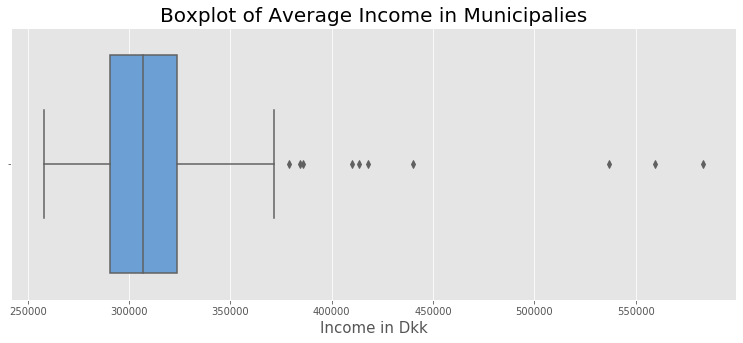

In [57]:
fig, ax = plt.subplots(figsize=(13, 5))
df3 = df.groupby('Kommune').mean().reset_index()
df3 = df3.sort_values('Kommunal_gennemsnitsinkomst_2017', ascending = False)
ax = sns.boxplot(x="Kommunal_gennemsnitsinkomst_2017", data=df3, color = '#5AA0E7')
plt.title('Boxplot of Average Income in Municipalies', size = 20)
plt.xlabel('Income in Dkk', size = 15)
fig.savefig('Boxplot_Income.png')

## M^2 in Municipality

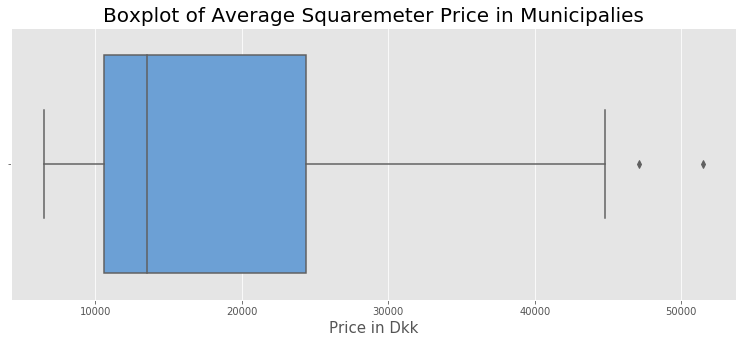

In [52]:
fig, ax = plt.subplots(figsize=(13, 5))
df1 = df.groupby('Kommune').mean().reset_index()
df1 = df1.sort_values('squaremeterPrice', ascending = False)
ax = sns.boxplot(x="squaremeterPrice", data=df1, color = '#5AA0E7')
plt.title('Boxplot of Average Squaremeter Price in Municipalies', size = 20)
plt.xlabel('Price in Dkk', size = 15)
fig.savefig('Boxplot_Municipality.png')

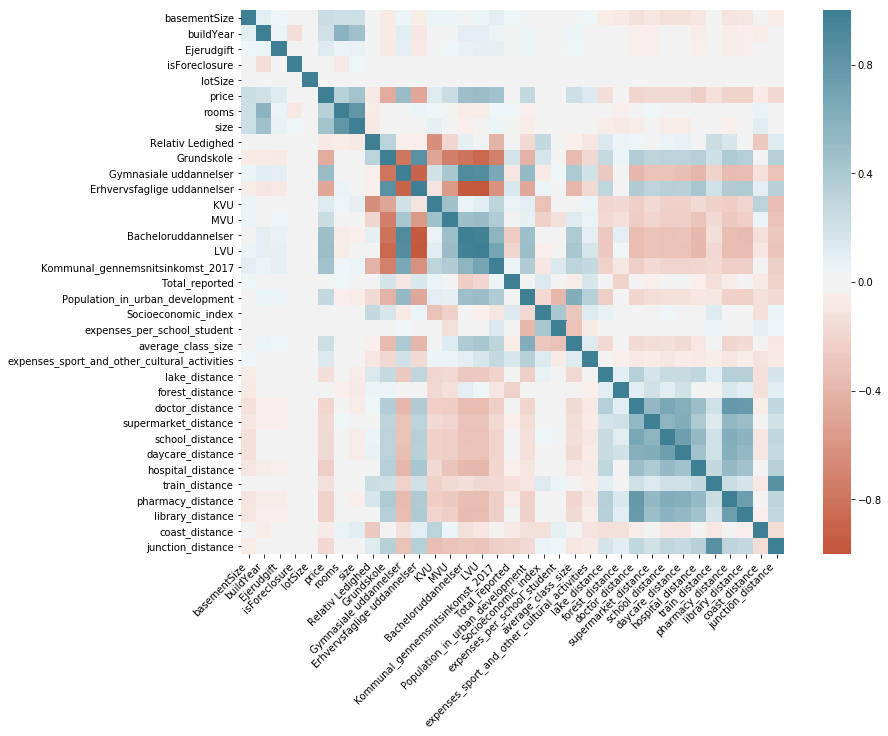

In [9]:
corr = df.corr()
plt.figure(figsize=(14, 10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Text(0.5, 0, 'Mean Price pr. Squaremeter ')

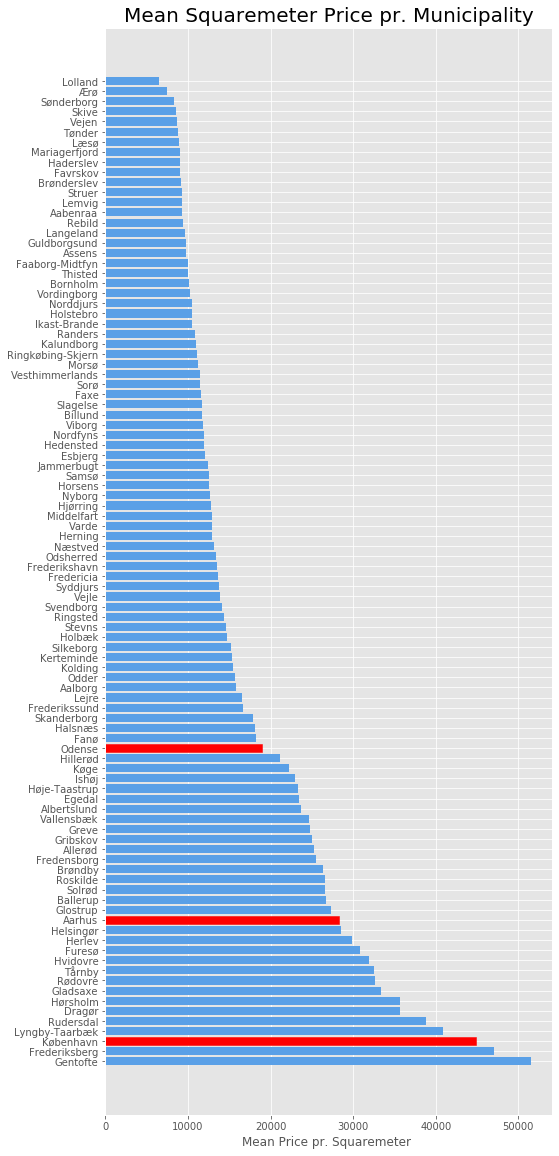

In [39]:
fig, ax = plt.subplots(figsize=(8,20))
df1 = df.groupby('Kommune').mean().reset_index()
df1 = df1.sort_values('squaremeterPrice', ascending = False)
ax = plt.barh(range(len(df1)), df1['squaremeterPrice'], color=["#5AA0E7"])
plt.style.use('ggplot')
ax[2].set_color('r') # København
ax[14].set_color('r') # Århus
ax[31].set_color('r') # Odense
plt.title('Mean Squaremeter Price pr. Municipality', size = 20)
plt.yticks(range(len(df1)), df1['Kommune'], rotation = 'horizontal')
plt.xlabel('Mean Price pr. Squaremeter ')
#fig.savefig('Barplot_Municipality.png')